In [55]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Disable warnings
import warnings; warnings.simplefilter('ignore')
from googletrans import Translator
translator = Translator()


In [56]:
#reading data
data_location = "/Users/sitaramchikkala/Documents/coupon recommendation system/coupon-purchase-prediction"
df_train_coupon_list=pd.read_csv(data_location+"/coupon_list_train.csv")
df_test_coupon_list=pd.read_csv(data_location+"/coupon_list_test.csv")

df_coupon_area_train=pd.read_csv(data_location+"/coupon_area_train.csv")
df_coupon_area_test =pd.read_csv(data_location+"/coupon_area_test.csv")

df_coupon_detail_train =pd.read_csv(data_location+"/coupon_detail_train.csv")
df_coupon_visit_train = pd.read_csv(data_location+"/coupon_visit_train.csv")

df_users = pd.read_csv(data_location+"/user_list.csv")
df_prefecture_locations = pd.read_csv(data_location+"/prefecture_locations.csv")

In [57]:
df_test_coupon_list.columns = df_test_coupon_list.columns.str.upper()
df_train_coupon_list.columns = df_train_coupon_list.columns.str.upper()


df_coupon_list = df_train_coupon_list.append(df_test_coupon_list)
df_coupon_area = df_coupon_area_train.append(df_coupon_area_test)


In [58]:
pref_name_unq=df_coupon_area['PREF_NAME'].unique()
small_area_name_unq=df_coupon_area['SMALL_AREA_NAME'].unique()

pref_name_unq_conv = [translator.translate(x, src='ja', dest='en').text for x in pref_name_unq]
small_area_name_unq_conv = [translator.translate(x, src='ja', dest='en').text for x in small_area_name_unq]

df_pref_eng = pd.DataFrame(columns=['PREF_NAME','PREF_ENG'])
df_pref_eng['PREF_NAME']=pref_name_unq
df_pref_eng['PREF_ENG']=pref_name_unq_conv


df_small_eng = pd.DataFrame(columns=['SMALL_AREA_NAME','SMALL_AREA_ENG'])
df_small_eng['SMALL_AREA_NAME']=small_area_name_unq
df_small_eng['SMALL_AREA_ENG']=small_area_name_unq_conv

In [59]:
xls = pd.ExcelFile(data_location+"/documentation/CAPSULE_TEXT_Translation.xlsx")
df_capsule = pd.read_excel(xls, 'capsule')
df_genre = pd.read_excel(xls, 'genre')

In [60]:
df_LARGE_AREA_NAME=pd.DataFrame()
df_LARGE_AREA_NAME['LARGE_AREA_NAME']=df_coupon_list['LARGE_AREA_NAME'].unique()
df_LARGE_AREA_NAME['LARGE_AREA_ENG']=[translator.translate(x, dest='en').text for x in df_LARGE_AREA_NAME['LARGE_AREA_NAME']]

In [61]:
df_test_coupon_list=pd.merge(df_test_coupon_list,df_capsule,how='inner',on='CAPSULE_TEXT')
df_test_coupon_list=pd.merge(df_test_coupon_list,df_genre,how='inner',on='GENRE_NAME')
df_test_coupon_list=pd.merge(df_test_coupon_list,df_small_eng,how='inner',on='SMALL_AREA_NAME')
df_test_coupon_list=pd.merge(df_test_coupon_list,df_LARGE_AREA_NAME,how='inner',on='LARGE_AREA_NAME')
df_test_coupon_list.columns = df_test_coupon_list.columns.str.upper()
df_test_coupon_list

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,LARGE_AREA_NAME,KEN_NAME,SMALL_AREA_NAME,COUPON_ID_HASH,CAPSULE_ENG,GENRE_ENG,SMALL_AREA_ENG,LARGE_AREA_ENG
0,グルメ,グルメ,52,5659,2690,2012-06-26 12:00:00,2012-06-30 12:00:00,4,2012-07-01,2012-10-27,...,1.0,1.0,関西,大阪府,ミナミ他,c76ea297ebd3a5a4d3bf9f75269f66fa,Food,Food,Minami and others,Kansai
1,グルメ,グルメ,52,6300,2980,2012-06-25 12:00:00,2012-06-30 12:00:00,5,2012-07-01,2012-12-01,...,1.0,1.0,関西,大阪府,ミナミ他,16a9c255c41dbeb9c8484dfc782a2a89,Food,Food,Minami and others,Kansai
2,グルメ,グルメ,52,3150,1500,2012-06-30 12:00:00,2012-07-06 12:00:00,6,2012-07-09,2012-12-31,...,2.0,1.0,関西,大阪府,ミナミ他,ca7065a34aff7f15df48713a66f3d8b3,Food,Food,Minami and others,Kansai
3,グルメ,グルメ,50,930,460,2012-06-27 12:00:00,2012-07-03 12:00:00,6,2012-07-04,2012-11-11,...,1.0,1.0,関西,大阪府,ミナミ他,79de77aa8c36fdf17cb3366e2084e353,Food,Food,Minami and others,Kansai
4,ヘアサロン,ヘアサロン,78,20500,4500,2012-06-27 12:00:00,2012-07-02 12:00:00,5,2012-07-03,2012-10-03,...,1.0,1.0,関西,大阪府,ミナミ他,668971cfcbfd84e5b603b5ab301d6ce4,Hair salon,Hair salon,Minami and others,Kansai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,レジャー,レジャー,50,3100,1550,2012-06-26 12:00:00,2012-06-30 12:00:00,4,2012-07-04,2012-10-31,...,0.0,1.0,中国,広島県,広島,7ae7775de3a0554dae8e114102c77ba2,Leisure,Leisure,Hiroshima,China
306,ホテル,ホテル・旅館,57,10710,4500,2012-06-24 12:00:00,2012-06-28 12:00:00,4,2012-06-29,2012-11-30,...,1.0,2.0,中国,広島県,広島,8fd793531e6b835a112338ee9a5f40e9,Hotel,Hotel and Japanese hotel,Hiroshima,China
307,ホテル,ホテル・旅館,69,16170,5000,2012-06-26 12:00:00,2012-07-01 12:00:00,5,2012-07-02,2012-12-27,...,1.0,2.0,中国,広島県,広島,3dcb2da19b5975df3a17313dd4e05f27,Hotel,Hotel and Japanese hotel,Hiroshima,China
308,通信講座,レッスン,60,48500,19400,2012-06-26 12:00:00,2012-06-28 12:00:00,2,NaN,NaN,...,NaN,NaN,中国,広島県,広島,97bab5a07fe422716e899f452d6beff2,Correspondence course,Lesson,Hiroshima,China


In [62]:
df_train_coupon_list=pd.merge(df_train_coupon_list,df_capsule,how='inner',on='CAPSULE_TEXT')
df_train_coupon_list=pd.merge(df_train_coupon_list,df_genre,how='inner',on='GENRE_NAME')
df_train_coupon_list=pd.merge(df_train_coupon_list,df_small_eng,how='inner',on='SMALL_AREA_NAME')
df_train_coupon_list=pd.merge(df_train_coupon_list,df_LARGE_AREA_NAME,how='inner',on='LARGE_AREA_NAME')
df_train_coupon_list.columns = df_train_coupon_list.columns.str.upper()
df_train_coupon_list

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,LARGE_AREA_NAME,KEN_NAME,SMALL_AREA_NAME,COUPON_ID_HASH,CAPSULE_ENG,GENRE_ENG,SMALL_AREA_ENG,LARGE_AREA_ENG
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,Food,Food,Saitama,Kanto
1,グルメ,グルメ,50,8000,3980,2011-07-01 12:00:00,2011-07-03 12:00:00,2,2011-07-05,2011-12-31,...,1.0,1.0,関東,埼玉県,埼玉,c5e7bccd11979d5378fb58ee6266e692,Food,Food,Saitama,Kanto
2,グルメ,グルメ,50,5000,2500,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-11-30,...,1.0,0.0,関東,埼玉県,埼玉,abb72b6cf95fb0b1cf6d2d329bf6b10a,Food,Food,Saitama,Kanto
3,グルメ,グルメ,59,4980,2000,2011-07-17 12:00:00,2011-07-19 12:00:00,2,2011-07-20,2011-10-15,...,1.0,1.0,関東,埼玉県,埼玉,770be6a3b5e650bf51e02fe996a3c420,Food,Food,Saitama,Kanto
4,グルメ,グルメ,50,9240,4580,2011-07-28 12:00:00,2011-07-31 12:00:00,3,2011-08-01,2011-12-15,...,1.0,1.0,関東,埼玉県,埼玉,fb81e6898e4c46d6e054d35e9ec10e0d,Food,Food,Saitama,Kanto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19408,旅館,ホテル・旅館,50,10000,5000,2012-04-10 12:00:00,2012-04-13 12:00:00,3,2012-04-20,2012-07-31,...,1.0,2.0,北信越,富山県,富山,38a1c754e8f059a81ebccc3bbfb5b237,Japanese hotel,Hotel and Japanese hotel,Toyama,Hokushinetsu
19409,旅館,ホテル・旅館,50,10000,5000,2012-04-20 12:00:00,2012-04-23 12:00:00,3,2012-04-26,2012-07-31,...,1.0,2.0,北信越,富山県,富山,d8b887c15d52dadd3ef6546a2bcd84bd,Japanese hotel,Hotel and Japanese hotel,Toyama,Hokushinetsu
19410,旅館,ホテル・旅館,50,23500,11750,2012-05-18 12:00:00,2012-05-22 12:00:00,4,2012-06-01,2012-09-30,...,1.0,2.0,北信越,富山県,富山,9f31a1914488c35ccf8acdb424d21ecc,Japanese hotel,Hotel and Japanese hotel,Toyama,Hokushinetsu
19411,旅館,ホテル・旅館,50,8800,4400,2012-05-10 12:00:00,2012-05-15 12:00:00,5,2012-05-16,2012-07-20,...,1.0,2.0,北信越,富山県,富山,7af1736e01555cf024bc84b79f630f6a,Japanese hotel,Hotel and Japanese hotel,Toyama,Hokushinetsu


In [63]:
df_coupon_area_train

,SMALL_AREA_NAME,PREF_NAME,COUPON_ID_hash
0,埼玉,埼玉県,6b263844241eea98c5a97f1335ea82af
1,千葉,千葉県,cc031f250e8bad1e24060263b9fc0ddd
2,千葉,千葉県,ba5e9b7453ca52ff711635a5d2e8102d
3,千葉,千葉県,3e1ffbedca3569f9e8032d401e8cb4e6
4,千葉,千葉県,782934b6c815b4030ea204eef7d4a734
...,...,...,...
138180,新潟,新潟県,fe334f1a5e0dc54eca76b9dd9559661b
138181,新宿・高田馬場・中野・吉祥寺,東京都,8dc11b257cb1c5b98e7b7c66d9b2b779
138182,渋谷・青山・自由が丘,東京都,b15e2d7619c3fd9c6be567c971bdf4f4
138183,銀座・新橋・東京・上野,東京都,e1141a4b2798450f36e40090659c0b07


In [64]:
df_coupon_area_train=pd.merge(df_coupon_area_train,df_pref_eng,how='inner',on='PREF_NAME')
df_coupon_area_train=pd.merge(df_coupon_area_train,df_small_eng,how='inner',on='SMALL_AREA_NAME')

df_coupon_area_test=pd.merge(df_coupon_area_test,df_pref_eng,how='inner',on='PREF_NAME')
df_coupon_area_test=pd.merge(df_coupon_area_test,df_small_eng,how='inner',on='SMALL_AREA_NAME')

In [65]:
df_coupon_detail_train

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash
0,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a
1,1,2011-07-04 23:52:54,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7
2,1,2011-07-16 00:52:49,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
3,1,2011-07-16 00:54:53,恵比寿・目黒・品川,2f30f46937cc9004774e576914b2aa1a,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
4,1,2011-07-16 00:55:52,恵比寿・目黒・品川,4d000c64a55ac573d0ae1a8f03677f50,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
...,...,...,...,...,...,...
168991,1,2012-02-07 12:14:50,池袋・神楽坂・赤羽,84b0c66349ae3c807f1d4601bfc0e8f6,280f0cedda5c4b171ee6245889659571,6eac7a7e347c563e5e00086f5eb47903
168992,1,2012-02-28 15:43:21,銀座・新橋・東京・上野,f7b2b854457ae6ece44be04c32520064,280f0cedda5c4b171ee6245889659571,a406e389e35e1140e4bc9b472d8258df
168993,1,2012-03-19 12:11:16,銀座・新橋・東京・上野,e12f28eb208f5466dede7a7cb2fc566b,280f0cedda5c4b171ee6245889659571,36addcc4b958135895c859d8783e3cd2
168994,2,2012-04-12 12:27:34,新宿・高田馬場・中野・吉祥寺,bcade77b186543a4820b3a6e3c06ad2f,280f0cedda5c4b171ee6245889659571,cb0244705306aafccc47bfe62ece39d3


In [66]:
df_coupon_detail_train=pd.merge(df_coupon_detail_train,df_small_eng,how='inner',on='SMALL_AREA_NAME')
df_coupon_detail_train.columns = df_coupon_detail_train.columns.str.upper()
df_coupon_detail_train

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_HASH,USER_ID_HASH,COUPON_ID_HASH,SMALL_AREA_ENG
0,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,Hyogo
1,1,2011-07-04 09:16:54,兵庫,96a5a0e775b757c92f5cd8488f176eaf,70479ee8862d202936b82f61510a082d,767673b7a777854a92b73b0934ddfae7,Hyogo
2,3,2011-12-24 01:29:12,兵庫,c83d92037ccc075ab0a33d45d771e816,ab0e0b8fb7e0e7e0ddf68275e9bba30c,2a863acc7803c4c9efd2af14f1e380d7,Hyogo
3,2,2012-01-11 12:06:01,兵庫,6954c3a6420cbad8838a944220a30cf1,ab0e0b8fb7e0e7e0ddf68275e9bba30c,70753671abf8410ab79396ea9e55187b,Hyogo
4,1,2012-01-29 05:27:36,兵庫,ffd04cd3c831302e2c5f3e6cacc6e6e1,ab0e0b8fb7e0e7e0ddf68275e9bba30c,bacd08027b226bef4f551277ff586b43,Hyogo
...,...,...,...,...,...,...,...
168991,1,2011-09-24 21:55:44,山梨,67aab53df3edd3ad5cce80d7f785a850,1eb40217cf017f9519d02bd0ffc29d67,a457cc6e392d9216915d485ed3c27b01,Yamanashi
168992,1,2011-08-19 19:06:18,山梨,ffe0989e3824adc8f4d5e3e600fa75ee,4d83ac3d532a547f3b4e7e8c7d64ed2d,d39076f08aecb01ac1cc3c45561939d9,Yamanashi
168993,1,2011-10-27 12:41:29,山梨,a49da499124757cdd89ca84fe297cba3,016331a24139def6e88b4da39f8ab8c4,32345b6d372d5f536d8a3f8237a564b1,Yamanashi
168994,1,2012-02-17 15:35:24,山梨,5a5b99d51829c7ae18d1898c0d75cd1a,15f13e9c27e66ca5a6fdd3afbbe02564,22a3ea9f8f7324a78d707625bc477706,Yamanashi


In [67]:
df_users=pd.merge(df_users,df_pref_eng,how='inner',on='PREF_NAME')
df_users.columns = df_users.columns.str.upper()
df_users

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_HASH,PREF_ENG
0,2011-05-18 00:41:48,f,34,NaN,東京都,560574a339f1b25e57b0221e486907ed,Tokyo
1,2012-01-09 14:44:30,f,39,NaN,東京都,eb2e1864a5db99653a03b3052824b211,Tokyo
2,2011-02-26 16:46:45,m,44,NaN,東京都,73011216a9731f575f857b08a891c9ee,Tokyo
3,2011-04-18 20:22:43,f,34,NaN,東京都,a9499d0a1ebdaec8c00393601f72c4fb,Tokyo
4,2011-02-15 23:54:50,m,34,NaN,東京都,1e84c80cd9dbd64e35b4de9b6bb1b996,Tokyo
...,...,...,...,...,...,...,...
15612,2011-05-22 17:47:21,f,54,NaN,鳥取県,74b3695c8c34b2af404dfacc5eed6b30,Tottori prefecture
15613,2011-05-19 22:19:01,m,58,NaN,鳥取県,d4b2fdea7e0777db92895a2e92e82188,Tottori prefecture
15614,2011-10-07 23:10:26,f,32,NaN,鳥取県,f180f1a89a8b3c998f364ca1ca474df2,Tottori prefecture
15615,2011-05-28 19:34:24,m,41,NaN,鳥取県,ecc93f46c4fe3910e16473302dae9208,Tottori prefecture


In [68]:
df_prefecture_locations=pd.merge(df_prefecture_locations,df_pref_eng,how='inner',on='PREF_NAME')
df_prefecture_locations

,PREF_NAME,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE,PREF_ENG
0,北海道,札幌市,43.063968,141.347899,Hokkaido
1,青森県,青森市,40.824623,140.740593,Aomori Prefecture
2,岩手県,盛岡市,39.703531,141.152667,Iwate Prefecture
3,宮城県,仙台市,38.268839,140.872103,Miyagi Prefecture
4,秋田県,秋田市,39.718600,140.102334,Akita
5,山形県,山形市,38.240437,140.363634,Yamagata Prefecture
6,福島県,福島市,37.750299,140.467521,Fukushima Prefecture
7,茨城県,水戸市,36.341813,140.446793,Ibaraki Prefecture
8,栃木県,宇都宮市,36.565725,139.883565,Tochigi Prefecture
9,群馬県,前橋市,36.391208,139.060156,Gunma Prefecture


In [69]:
df_train_coupon_list.shape

(19413, 28)

In [70]:
df_coupon_visit_train.shape

(2833180, 8)

In [71]:
df_test_coupon_list.shape

(310, 28)

In [72]:
df_coupon_detail_train.shape

(168996, 7)

In [73]:
df_users.shape

(15617, 7)

In [74]:
df_coupon_detail_train.describe()

,ITEM_COUNT
count,168996.000000
mean,1.430939
std,0.982732
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,55.000000


In [75]:
df_coupon_detail_train.head()

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_HASH,USER_ID_HASH,COUPON_ID_HASH,SMALL_AREA_ENG
0,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,Hyogo
1,1,2011-07-04 09:16:54,兵庫,96a5a0e775b757c92f5cd8488f176eaf,70479ee8862d202936b82f61510a082d,767673b7a777854a92b73b0934ddfae7,Hyogo
2,3,2011-12-24 01:29:12,兵庫,c83d92037ccc075ab0a33d45d771e816,ab0e0b8fb7e0e7e0ddf68275e9bba30c,2a863acc7803c4c9efd2af14f1e380d7,Hyogo
3,2,2012-01-11 12:06:01,兵庫,6954c3a6420cbad8838a944220a30cf1,ab0e0b8fb7e0e7e0ddf68275e9bba30c,70753671abf8410ab79396ea9e55187b,Hyogo
4,1,2012-01-29 05:27:36,兵庫,ffd04cd3c831302e2c5f3e6cacc6e6e1,ab0e0b8fb7e0e7e0ddf68275e9bba30c,bacd08027b226bef4f551277ff586b43,Hyogo


## Users - EDA

In [76]:
df_users

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_HASH,PREF_ENG
0,2011-05-18 00:41:48,f,34,NaN,東京都,560574a339f1b25e57b0221e486907ed,Tokyo
1,2012-01-09 14:44:30,f,39,NaN,東京都,eb2e1864a5db99653a03b3052824b211,Tokyo
2,2011-02-26 16:46:45,m,44,NaN,東京都,73011216a9731f575f857b08a891c9ee,Tokyo
3,2011-04-18 20:22:43,f,34,NaN,東京都,a9499d0a1ebdaec8c00393601f72c4fb,Tokyo
4,2011-02-15 23:54:50,m,34,NaN,東京都,1e84c80cd9dbd64e35b4de9b6bb1b996,Tokyo
...,...,...,...,...,...,...,...
15612,2011-05-22 17:47:21,f,54,NaN,鳥取県,74b3695c8c34b2af404dfacc5eed6b30,Tottori prefecture
15613,2011-05-19 22:19:01,m,58,NaN,鳥取県,d4b2fdea7e0777db92895a2e92e82188,Tottori prefecture
15614,2011-10-07 23:10:26,f,32,NaN,鳥取県,f180f1a89a8b3c998f364ca1ca474df2,Tottori prefecture
15615,2011-05-28 19:34:24,m,41,NaN,鳥取県,ecc93f46c4fe3910e16473302dae9208,Tottori prefecture


In [77]:
df_users.isnull().sum()


REG_DATE             0
SEX_ID               0
AGE                  0
WITHDRAW_DATE    15245
PREF_NAME            0
USER_ID_HASH         0
PREF_ENG             0
dtype: int64

In [78]:
#boxing age with range

df_users['AGE'] = pd.cut(x=df_users['AGE'], bins=[0, 3, 19, 39, 63, 99],
                     labels=['Baby/Toddler', 'Child', 'Teenage','Adult', 'Older Adult'
                             'Elderly'])

In [79]:
#converting to numerical columns
df_users[['SEX_ID','AGE']] = df_users[['SEX_ID','AGE']].apply(lambda x: pd.factorize(x)[0])


In [80]:
df_users

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_HASH,PREF_ENG
0,2011-05-18 00:41:48,0,0,NaN,東京都,560574a339f1b25e57b0221e486907ed,Tokyo
1,2012-01-09 14:44:30,0,0,NaN,東京都,eb2e1864a5db99653a03b3052824b211,Tokyo
2,2011-02-26 16:46:45,1,1,NaN,東京都,73011216a9731f575f857b08a891c9ee,Tokyo
3,2011-04-18 20:22:43,0,0,NaN,東京都,a9499d0a1ebdaec8c00393601f72c4fb,Tokyo
4,2011-02-15 23:54:50,1,0,NaN,東京都,1e84c80cd9dbd64e35b4de9b6bb1b996,Tokyo
...,...,...,...,...,...,...,...
15612,2011-05-22 17:47:21,0,1,NaN,鳥取県,74b3695c8c34b2af404dfacc5eed6b30,Tottori prefecture
15613,2011-05-19 22:19:01,1,1,NaN,鳥取県,d4b2fdea7e0777db92895a2e92e82188,Tottori prefecture
15614,2011-10-07 23:10:26,0,0,NaN,鳥取県,f180f1a89a8b3c998f364ca1ca474df2,Tottori prefecture
15615,2011-05-28 19:34:24,1,1,NaN,鳥取県,ecc93f46c4fe3910e16473302dae9208,Tottori prefecture


In [81]:
df_users.describe()

,SEX_ID,AGE
count,15617.000000,15617.000000
mean,0.534354,0.668566
std,0.498834,0.585674
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,3.000000


<AxesSubplot:xlabel='SEX_ID', ylabel='count'>

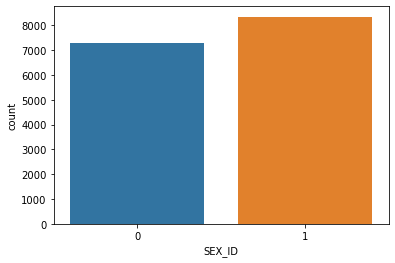

In [82]:
sns.countplot('SEX_ID',data=df_users)

In [83]:
df_users['SEX_ID'].value_counts()

1    8345
0    7272
Name: SEX_ID, dtype: int64

<AxesSubplot:>

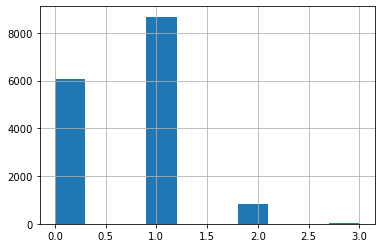

In [84]:
df_users.AGE.hist()

In [85]:
df_coupon_list = df_train_coupon_list.append(df_test_coupon_list)
df_coupon_area = df_coupon_area_train.append(df_coupon_area_test)


In [86]:
df_coupon_list

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,LARGE_AREA_NAME,KEN_NAME,SMALL_AREA_NAME,COUPON_ID_HASH,CAPSULE_ENG,GENRE_ENG,SMALL_AREA_ENG,LARGE_AREA_ENG
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,Food,Food,Saitama,Kanto
1,グルメ,グルメ,50,8000,3980,2011-07-01 12:00:00,2011-07-03 12:00:00,2,2011-07-05,2011-12-31,...,1.0,1.0,関東,埼玉県,埼玉,c5e7bccd11979d5378fb58ee6266e692,Food,Food,Saitama,Kanto
2,グルメ,グルメ,50,5000,2500,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-11-30,...,1.0,0.0,関東,埼玉県,埼玉,abb72b6cf95fb0b1cf6d2d329bf6b10a,Food,Food,Saitama,Kanto
3,グルメ,グルメ,59,4980,2000,2011-07-17 12:00:00,2011-07-19 12:00:00,2,2011-07-20,2011-10-15,...,1.0,1.0,関東,埼玉県,埼玉,770be6a3b5e650bf51e02fe996a3c420,Food,Food,Saitama,Kanto
4,グルメ,グルメ,50,9240,4580,2011-07-28 12:00:00,2011-07-31 12:00:00,3,2011-08-01,2011-12-15,...,1.0,1.0,関東,埼玉県,埼玉,fb81e6898e4c46d6e054d35e9ec10e0d,Food,Food,Saitama,Kanto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,レジャー,レジャー,50,3100,1550,2012-06-26 12:00:00,2012-06-30 12:00:00,4,2012-07-04,2012-10-31,...,0.0,1.0,中国,広島県,広島,7ae7775de3a0554dae8e114102c77ba2,Leisure,Leisure,Hiroshima,China
306,ホテル,ホテル・旅館,57,10710,4500,2012-06-24 12:00:00,2012-06-28 12:00:00,4,2012-06-29,2012-11-30,...,1.0,2.0,中国,広島県,広島,8fd793531e6b835a112338ee9a5f40e9,Hotel,Hotel and Japanese hotel,Hiroshima,China
307,ホテル,ホテル・旅館,69,16170,5000,2012-06-26 12:00:00,2012-07-01 12:00:00,5,2012-07-02,2012-12-27,...,1.0,2.0,中国,広島県,広島,3dcb2da19b5975df3a17313dd4e05f27,Hotel,Hotel and Japanese hotel,Hiroshima,China
308,通信講座,レッスン,60,48500,19400,2012-06-26 12:00:00,2012-06-28 12:00:00,2,NaN,NaN,...,NaN,NaN,中国,広島県,広島,97bab5a07fe422716e899f452d6beff2,Correspondence course,Lesson,Hiroshima,China


In [87]:
df_coupon_list.isnull().sum()


CAPSULE_TEXT                     0
GENRE_NAME                       0
PRICE_RATE                       0
CATALOG_PRICE                    0
DISCOUNT_PRICE                   0
DISPFROM                         0
DISPEND                          0
DISPPERIOD                       0
VALIDFROM                     6243
VALIDEND                      6243
VALIDPERIOD                   6243
USABLE_DATE_MON               7106
USABLE_DATE_TUE               7106
USABLE_DATE_WED               7106
USABLE_DATE_THU               7106
USABLE_DATE_FRI               7106
USABLE_DATE_SAT               7106
USABLE_DATE_SUN               7106
USABLE_DATE_HOLIDAY           7106
USABLE_DATE_BEFORE_HOLIDAY    7106
LARGE_AREA_NAME                  0
KEN_NAME                         0
SMALL_AREA_NAME                  0
COUPON_ID_HASH                   0
CAPSULE_ENG                      0
GENRE_ENG                        0
SMALL_AREA_ENG                   0
LARGE_AREA_ENG                   0
dtype: int64

In [88]:
df_coupon_list['USABLE_DATE_SUN'].isnull().value_counts()

False    12617
True      7106
Name: USABLE_DATE_SUN, dtype: int64

In [89]:
df_coupon_list[df_coupon_list['USABLE_DATE_SUN'].isnull()]

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,LARGE_AREA_NAME,KEN_NAME,SMALL_AREA_NAME,COUPON_ID_HASH,CAPSULE_ENG,GENRE_ENG,SMALL_AREA_ENG,LARGE_AREA_ENG
113,宅配,宅配,50,6237,3100,2011-07-03 12:00:00,2011-07-04 12:00:00,1,NaN,NaN,...,NaN,NaN,関東,埼玉県,埼玉,4e28f81c8f916b5bbbbd8cc8b93e6888,Delivery service,Delivery service,Saitama,Kanto
114,宅配,宅配,50,2880,1430,2011-06-30 12:00:00,2011-07-02 12:00:00,2,NaN,NaN,...,NaN,NaN,関東,埼玉県,埼玉,3f8906815eecafb9f979c8d047b6efe4,Delivery service,Delivery service,Saitama,Kanto
115,宅配,宅配,50,2940,1470,2011-07-04 12:00:00,2011-07-05 12:00:00,1,NaN,NaN,...,NaN,NaN,関東,埼玉県,埼玉,e54b62d807faeec474e3ce0728f50e61,Delivery service,Delivery service,Saitama,Kanto
116,宅配,宅配,50,2000,990,2011-07-11 12:00:00,2011-07-13 12:00:00,2,NaN,NaN,...,NaN,NaN,関東,埼玉県,埼玉,f290af5a21d16311b94b9123d5ee442b,Delivery service,Delivery service,Saitama,Kanto
117,宅配,宅配,67,3000,990,2011-07-05 12:00:00,2011-07-07 12:00:00,2,NaN,NaN,...,NaN,NaN,関東,埼玉県,埼玉,19d59ee1abb5a7eb3dd0894b4f7e131f,Delivery service,Delivery service,Saitama,Kanto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,WEBサービス,その他のクーポン,83,3500,580,2012-06-26 12:00:00,2012-07-03 12:00:00,7,2012-07-04,2012-09-12,...,NaN,NaN,北海道,北海道,北海道,2cb5e0a522dcb7c539018c165359ad5a,Web service,Other coupon,Hokkaido,Hokkaido
293,宅配,宅配,50,5640,2820,2012-06-25 12:00:00,2012-06-28 12:00:00,3,NaN,NaN,...,NaN,NaN,四国,高知県,高知,0147fd072c6ef4e299d428f19a5f0e01,Delivery service,Delivery service,Kochi,Shikoku
294,宅配,宅配,61,3289,1280,2012-06-27 12:00:00,2012-07-01 12:00:00,4,NaN,NaN,...,NaN,NaN,北信越,石川県,石川,c60dbd64087f40d46d539a96947d0e87,Delivery service,Delivery service,Ishikawa,Hokushinetsu
295,宅配,宅配,73,6800,1800,2012-06-29 12:00:00,2012-07-03 12:00:00,4,NaN,NaN,...,NaN,NaN,北信越,長野県,長野,c1812b1c062f096ce5e58cfd6ba86d62,Delivery service,Delivery service,Nagano,Hokushinetsu


In [90]:
df_coupon_list.dtypes

CAPSULE_TEXT                   object
GENRE_NAME                     object
PRICE_RATE                      int64
CATALOG_PRICE                   int64
DISCOUNT_PRICE                  int64
DISPFROM                       object
DISPEND                        object
DISPPERIOD                      int64
VALIDFROM                      object
VALIDEND                       object
VALIDPERIOD                   float64
USABLE_DATE_MON               float64
USABLE_DATE_TUE               float64
USABLE_DATE_WED               float64
USABLE_DATE_THU               float64
USABLE_DATE_FRI               float64
USABLE_DATE_SAT               float64
USABLE_DATE_SUN               float64
USABLE_DATE_HOLIDAY           float64
USABLE_DATE_BEFORE_HOLIDAY    float64
LARGE_AREA_NAME                object
KEN_NAME                       object
SMALL_AREA_NAME                object
COUPON_ID_HASH                 object
CAPSULE_ENG                    object
GENRE_ENG                      object
SMALL_AREA_E

In [91]:
usable_column_list = ['USABLE_DATE_MON', 'USABLE_DATE_TUE', 'USABLE_DATE_WED', 'USABLE_DATE_THU', 'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY','USABLE_DATE_BEFORE_HOLIDAY','VALIDPERIOD']

In [92]:
df_coupon_list[usable_column_list] = df_coupon_list[usable_column_list].replace(np.nan, -99)


In [93]:
df_coupon_list[usable_column_list] = df_coupon_list[usable_column_list].astype('int64')


In [94]:
df_coupon_list.dtypes

CAPSULE_TEXT                  object
GENRE_NAME                    object
PRICE_RATE                     int64
CATALOG_PRICE                  int64
DISCOUNT_PRICE                 int64
DISPFROM                      object
DISPEND                       object
DISPPERIOD                     int64
VALIDFROM                     object
VALIDEND                      object
VALIDPERIOD                    int64
USABLE_DATE_MON                int64
USABLE_DATE_TUE                int64
USABLE_DATE_WED                int64
USABLE_DATE_THU                int64
USABLE_DATE_FRI                int64
USABLE_DATE_SAT                int64
USABLE_DATE_SUN                int64
USABLE_DATE_HOLIDAY            int64
USABLE_DATE_BEFORE_HOLIDAY     int64
LARGE_AREA_NAME               object
KEN_NAME                      object
SMALL_AREA_NAME               object
COUPON_ID_HASH                object
CAPSULE_ENG                   object
GENRE_ENG                     object
SMALL_AREA_ENG                object
L

In [95]:
#dropping all columns which are string and japnese
df_coupon_list = df_coupon_list.drop(['CAPSULE_TEXT','GENRE_NAME', 'KEN_NAME','SMALL_AREA_NAME','LARGE_AREA_NAME'], axis=1)


In [96]:
df_coupon_list

,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,COUPON_ID_HASH,CAPSULE_ENG,GENRE_ENG,SMALL_AREA_ENG,LARGE_AREA_ENG
0,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,151,1,...,0,0,1,1,0,6b263844241eea98c5a97f1335ea82af,Food,Food,Saitama,Kanto
1,50,8000,3980,2011-07-01 12:00:00,2011-07-03 12:00:00,2,2011-07-05,2011-12-31,179,1,...,1,1,1,1,1,c5e7bccd11979d5378fb58ee6266e692,Food,Food,Saitama,Kanto
2,50,5000,2500,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-11-30,146,1,...,0,0,1,1,0,abb72b6cf95fb0b1cf6d2d329bf6b10a,Food,Food,Saitama,Kanto
3,59,4980,2000,2011-07-17 12:00:00,2011-07-19 12:00:00,2,2011-07-20,2011-10-15,87,1,...,1,1,1,1,1,770be6a3b5e650bf51e02fe996a3c420,Food,Food,Saitama,Kanto
4,50,9240,4580,2011-07-28 12:00:00,2011-07-31 12:00:00,3,2011-08-01,2011-12-15,136,1,...,1,1,1,1,1,fb81e6898e4c46d6e054d35e9ec10e0d,Food,Food,Saitama,Kanto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,50,3100,1550,2012-06-26 12:00:00,2012-06-30 12:00:00,4,2012-07-04,2012-10-31,119,1,...,1,1,0,0,1,7ae7775de3a0554dae8e114102c77ba2,Leisure,Leisure,Hiroshima,China
306,57,10710,4500,2012-06-24 12:00:00,2012-06-28 12:00:00,4,2012-06-29,2012-11-30,154,1,...,1,2,1,1,2,8fd793531e6b835a112338ee9a5f40e9,Hotel,Hotel and Japanese hotel,Hiroshima,China
307,69,16170,5000,2012-06-26 12:00:00,2012-07-01 12:00:00,5,2012-07-02,2012-12-27,178,1,...,1,2,1,1,2,3dcb2da19b5975df3a17313dd4e05f27,Hotel,Hotel and Japanese hotel,Hiroshima,China
308,60,48500,19400,2012-06-26 12:00:00,2012-06-28 12:00:00,2,NaN,NaN,-99,-99,...,-99,-99,-99,-99,-99,97bab5a07fe422716e899f452d6beff2,Correspondence course,Lesson,Hiroshima,China


In [97]:
df_coupon_list['VALIDFROM'] = pd.to_numeric(df_coupon_list.VALIDFROM.str.replace('-',''))
df_coupon_list['VALIDEND'] = pd.to_numeric(df_coupon_list.VALIDEND.str.replace('-',''))


In [98]:
df_coupon_list['DISPFROM'] = pd.to_datetime(df_coupon_list['DISPFROM']).astype(int)/ 10**9
df_coupon_list['DISPEND'] = pd.to_datetime(df_coupon_list['DISPEND']).astype(int)/ 10**9


In [99]:
df_coupon_list.dtypes

PRICE_RATE                      int64
CATALOG_PRICE                   int64
DISCOUNT_PRICE                  int64
DISPFROM                      float64
DISPEND                       float64
DISPPERIOD                      int64
VALIDFROM                     float64
VALIDEND                      float64
VALIDPERIOD                     int64
USABLE_DATE_MON                 int64
USABLE_DATE_TUE                 int64
USABLE_DATE_WED                 int64
USABLE_DATE_THU                 int64
USABLE_DATE_FRI                 int64
USABLE_DATE_SAT                 int64
USABLE_DATE_SUN                 int64
USABLE_DATE_HOLIDAY             int64
USABLE_DATE_BEFORE_HOLIDAY      int64
COUPON_ID_HASH                 object
CAPSULE_ENG                    object
GENRE_ENG                      object
SMALL_AREA_ENG                 object
LARGE_AREA_ENG                 object
dtype: object

In [100]:
df_coupon_list[['VALIDFROM','VALIDEND']] = df_coupon_list[['VALIDFROM','VALIDEND']].replace(np.nan, 0)


In [101]:
df_coupon_list.isnull().sum()


PRICE_RATE                    0
CATALOG_PRICE                 0
DISCOUNT_PRICE                0
DISPFROM                      0
DISPEND                       0
DISPPERIOD                    0
VALIDFROM                     0
VALIDEND                      0
VALIDPERIOD                   0
USABLE_DATE_MON               0
USABLE_DATE_TUE               0
USABLE_DATE_WED               0
USABLE_DATE_THU               0
USABLE_DATE_FRI               0
USABLE_DATE_SAT               0
USABLE_DATE_SUN               0
USABLE_DATE_HOLIDAY           0
USABLE_DATE_BEFORE_HOLIDAY    0
COUPON_ID_HASH                0
CAPSULE_ENG                   0
GENRE_ENG                     0
SMALL_AREA_ENG                0
LARGE_AREA_ENG                0
dtype: int64

In [102]:
df_coupon_list

,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,COUPON_ID_HASH,CAPSULE_ENG,GENRE_ENG,SMALL_AREA_ENG,LARGE_AREA_ENG
0,50,3000,1500,1.310126e+09,1.310213e+09,1,20110710.0,20111208.0,151,1,...,0,0,1,1,0,6b263844241eea98c5a97f1335ea82af,Food,Food,Saitama,Kanto
1,50,8000,3980,1.309522e+09,1.309694e+09,2,20110705.0,20111231.0,179,1,...,1,1,1,1,1,c5e7bccd11979d5378fb58ee6266e692,Food,Food,Saitama,Kanto
2,50,5000,2500,1.309867e+09,1.309954e+09,1,20110707.0,20111130.0,146,1,...,0,0,1,1,0,abb72b6cf95fb0b1cf6d2d329bf6b10a,Food,Food,Saitama,Kanto
3,59,4980,2000,1.310904e+09,1.311077e+09,2,20110720.0,20111015.0,87,1,...,1,1,1,1,1,770be6a3b5e650bf51e02fe996a3c420,Food,Food,Saitama,Kanto
4,50,9240,4580,1.311854e+09,1.312114e+09,3,20110801.0,20111215.0,136,1,...,1,1,1,1,1,fb81e6898e4c46d6e054d35e9ec10e0d,Food,Food,Saitama,Kanto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,50,3100,1550,1.340712e+09,1.341058e+09,4,20120704.0,20121031.0,119,1,...,1,1,0,0,1,7ae7775de3a0554dae8e114102c77ba2,Leisure,Leisure,Hiroshima,China
306,57,10710,4500,1.340539e+09,1.340885e+09,4,20120629.0,20121130.0,154,1,...,1,2,1,1,2,8fd793531e6b835a112338ee9a5f40e9,Hotel,Hotel and Japanese hotel,Hiroshima,China
307,69,16170,5000,1.340712e+09,1.341144e+09,5,20120702.0,20121227.0,178,1,...,1,2,1,1,2,3dcb2da19b5975df3a17313dd4e05f27,Hotel,Hotel and Japanese hotel,Hiroshima,China
308,60,48500,19400,1.340712e+09,1.340885e+09,2,0.0,0.0,-99,-99,...,-99,-99,-99,-99,-99,97bab5a07fe422716e899f452d6beff2,Correspondence course,Lesson,Hiroshima,China


In [103]:
df_coupon_list['VALIDFROM'].value_counts(dropna=False)

0.0           6243
20120401.0     145
20120104.0     106
20111201.0      93
20110720.0      91
              ... 
20120902.0       1
20120725.0       1
20120711.0       1
20120716.0       1
20120712.0       1
Name: VALIDFROM, Length: 388, dtype: int64

Text(0.5, 0, 'Discount Rate')

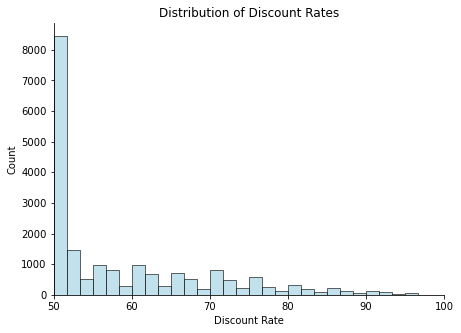

In [104]:
#df_coupon_list.hist(column='PRICE_RATE', grid=False, edgecolor='black')

#visualize the distribution of discount rates
plt.figure(figsize=(7,5))
ax = sns.histplot(df_coupon_list['PRICE_RATE'],bins=60,color='lightblue')
ax.set_xlim([50,100]) #very few data points are on the left side of 50 
sns.despine()

plt.title('Distribution of Discount Rates')
plt.xlabel('Discount Rate')

Text(0.5, 0, 'Original Price in Janpanese Yen')

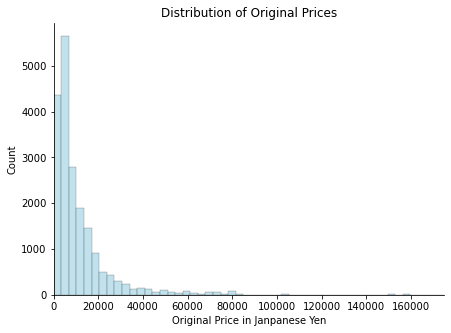

In [105]:
#df_coupon_list.hist(column='CATALOG_PRICE', grid=False, edgecolor='black')
#visualize the distribution of original prices in Japanese yen
plt.figure(figsize=(7,5))
ax = sns.histplot(df_coupon_list['CATALOG_PRICE'],
                  bins=200,color='lightblue')
ax.set_xlim([0,175000])
sns.despine()

plt.title('Distribution of Original Prices')
plt.xlabel('Original Price in Janpanese Yen')

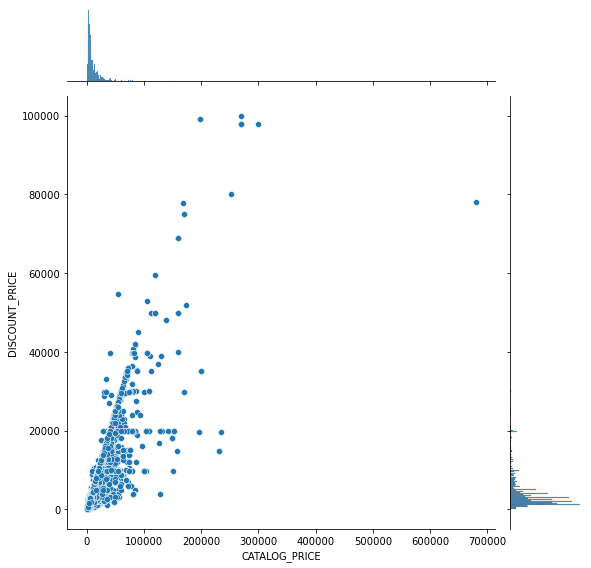

In [106]:
#joint plot to compare the origianl price and discount price
sns.jointplot(x='CATALOG_PRICE',y='DISCOUNT_PRICE',
              data=df_coupon_list,height=8)

In [109]:
df2 = pd.merge(df_coupon_list, df_coupon_detail_train, how='inner', on = ['COUPON_ID_HASH','SMALL_AREA_ENG'])
df_merged=pd.merge(df2, df_users, how='inner', on = 'USER_ID_HASH')
df_merged=df_merged.drop(columns=['DISPFROM','DISPEND','VALIDFROM','VALIDEND','PURCHASEID_HASH','PREF_NAME','SMALL_AREA_NAME','REG_DATE','WITHDRAW_DATE','I_DATE'])
df_merged

,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,...,COUPON_ID_HASH,CAPSULE_ENG,GENRE_ENG,SMALL_AREA_ENG,LARGE_AREA_ENG,ITEM_COUNT,USER_ID_HASH,SEX_ID,AGE,PREF_ENG
0,50,3000,1500,1,151,1,1,1,1,0,...,6b263844241eea98c5a97f1335ea82af,Food,Food,Saitama,Kanto,4,70525f64c16893bcbf600ab790053d01,1,1,Saitama
1,50,8000,3980,2,179,1,1,1,1,1,...,c5e7bccd11979d5378fb58ee6266e692,Food,Food,Saitama,Kanto,3,70525f64c16893bcbf600ab790053d01,1,1,Saitama
2,50,6000,3000,3,91,1,1,1,1,1,...,b4ee01eae835536eae1ba31500db5b64,Food,Food,Saitama,Kanto,2,70525f64c16893bcbf600ab790053d01,1,1,Saitama
3,52,2551,1200,3,171,1,1,1,1,1,...,489513aa18d96ac0f08d48ccad4b5475,Food,Food,Saitama,Kanto,2,70525f64c16893bcbf600ab790053d01,1,1,Saitama
4,70,22050,6615,4,89,1,1,1,1,1,...,b93fb3c7c63f0a74f5844b1ab7386154,Hair salon,Hair salon,Saitama,Kanto,1,70525f64c16893bcbf600ab790053d01,1,1,Saitama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69644,50,13500,6750,2,142,1,1,1,1,1,...,88f3758f9086dcc2b4c2114bbbcbd44c,Japanese hotel,Hotel and Japanese hotel,Toyama,Hokushinetsu,2,f4fd9ca3cc19314e6cfba3584399c074,1,2,Toyama Prefecture
69645,50,12000,6000,2,99,0,0,0,0,1,...,c77ed9845ce706cbe58b17eae622356b,Japanese hotel,Hotel and Japanese hotel,Toyama,Hokushinetsu,2,272b043b18a41cbb4f9766db49eea668,1,0,Toyama Prefecture
69646,50,12000,6000,2,99,0,0,0,0,1,...,c77ed9845ce706cbe58b17eae622356b,Japanese hotel,Hotel and Japanese hotel,Toyama,Hokushinetsu,2,272b043b18a41cbb4f9766db49eea668,1,0,Toyama Prefecture
69647,50,12000,6000,2,85,0,0,0,0,1,...,3c78ee0833c6367dcd95426ee08fd9df,Japanese hotel,Hotel and Japanese hotel,Toyama,Hokushinetsu,2,236ee9674bfbf13626e0e0d44219ce57,1,1,Toyama Prefecture


In [110]:
df_merged.columns

Index(['PRICE_RATE', 'CATALOG_PRICE', 'DISCOUNT_PRICE', 'DISPPERIOD',
       'VALIDPERIOD', 'USABLE_DATE_MON', 'USABLE_DATE_TUE', 'USABLE_DATE_WED',
       'USABLE_DATE_THU', 'USABLE_DATE_FRI', 'USABLE_DATE_SAT',
       'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY', 'USABLE_DATE_BEFORE_HOLIDAY',
       'COUPON_ID_HASH', 'CAPSULE_ENG', 'GENRE_ENG', 'SMALL_AREA_ENG',
       'LARGE_AREA_ENG', 'ITEM_COUNT', 'USER_ID_HASH', 'SEX_ID', 'AGE',
       'PREF_ENG'],
      dtype='object')

In [111]:
# df_prefecture_locations
# df_prefecture_locations[['PREF_NAME','PREFECTUAL_OFFICE']] = df_prefecture_locations[['PREF_NAME','PREFECTUAL_OFFICE']].replace(np.nan, "NONE")


In [112]:
df_merged.corr()

,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,ITEM_COUNT,SEX_ID,AGE
PRICE_RATE,1.000000,-0.013978,-0.246803,0.363288,-0.322822,-0.568911,-0.568938,-0.568852,-0.568831,-0.568813,-0.568753,-0.568713,-0.568874,-0.568810,-0.295354,-0.050246,-0.076270
CATALOG_PRICE,-0.013978,1.000000,0.841036,-0.177663,0.099976,0.215132,0.215144,0.215296,0.215225,0.215380,0.216270,0.215715,0.215451,0.215893,-0.040256,-0.054337,-0.000307
DISCOUNT_PRICE,-0.246803,0.841036,1.000000,-0.209806,0.163879,0.298181,0.298247,0.298335,0.298258,0.298467,0.299494,0.298771,0.298627,0.299122,0.020186,-0.008561,0.029558
DISPPERIOD,0.363288,-0.177663,-0.209806,1.000000,-0.065605,-0.364121,-0.364096,-0.364105,-0.364100,-0.364065,-0.364092,-0.364131,-0.364100,-0.364075,-0.136371,0.019257,-0.050952
VALIDPERIOD,-0.322822,0.099976,0.163879,-0.065605,1.000000,0.821088,0.821109,0.821123,0.821107,0.821104,0.821109,0.821023,0.821100,0.821166,0.286996,0.073852,0.001993
USABLE_DATE_MON,-0.568911,0.215132,0.298181,-0.364121,0.821088,1.000000,0.999983,0.999988,0.999989,0.999979,0.999963,0.999966,0.999974,0.999970,0.336869,0.049019,0.020674
USABLE_DATE_TUE,-0.568938,0.215144,0.298247,-0.364096,0.821109,0.999983,1.000000,0.999990,0.999991,0.999981,0.999964,0.999969,0.999975,0.999971,0.336781,0.048952,0.020580
USABLE_DATE_WED,-0.568852,0.215296,0.298335,-0.364105,0.821123,0.999988,0.999990,1.000000,0.999995,0.999984,0.999968,0.999973,0.999979,0.999975,0.336710,0.048863,0.020562
USABLE_DATE_THU,-0.568831,0.215225,0.298258,-0.364100,0.821107,0.999989,0.999991,0.999995,1.000000,0.999986,0.999969,0.999974,0.999980,0.999976,0.336744,0.048862,0.020570
USABLE_DATE_FRI,-0.568813,0.215380,0.298467,-0.364065,0.821104,0.999979,0.999981,0.999984,0.999986,1.000000,0.999973,0.999967,0.999973,0.999983,0.336705,0.048846,0.020606


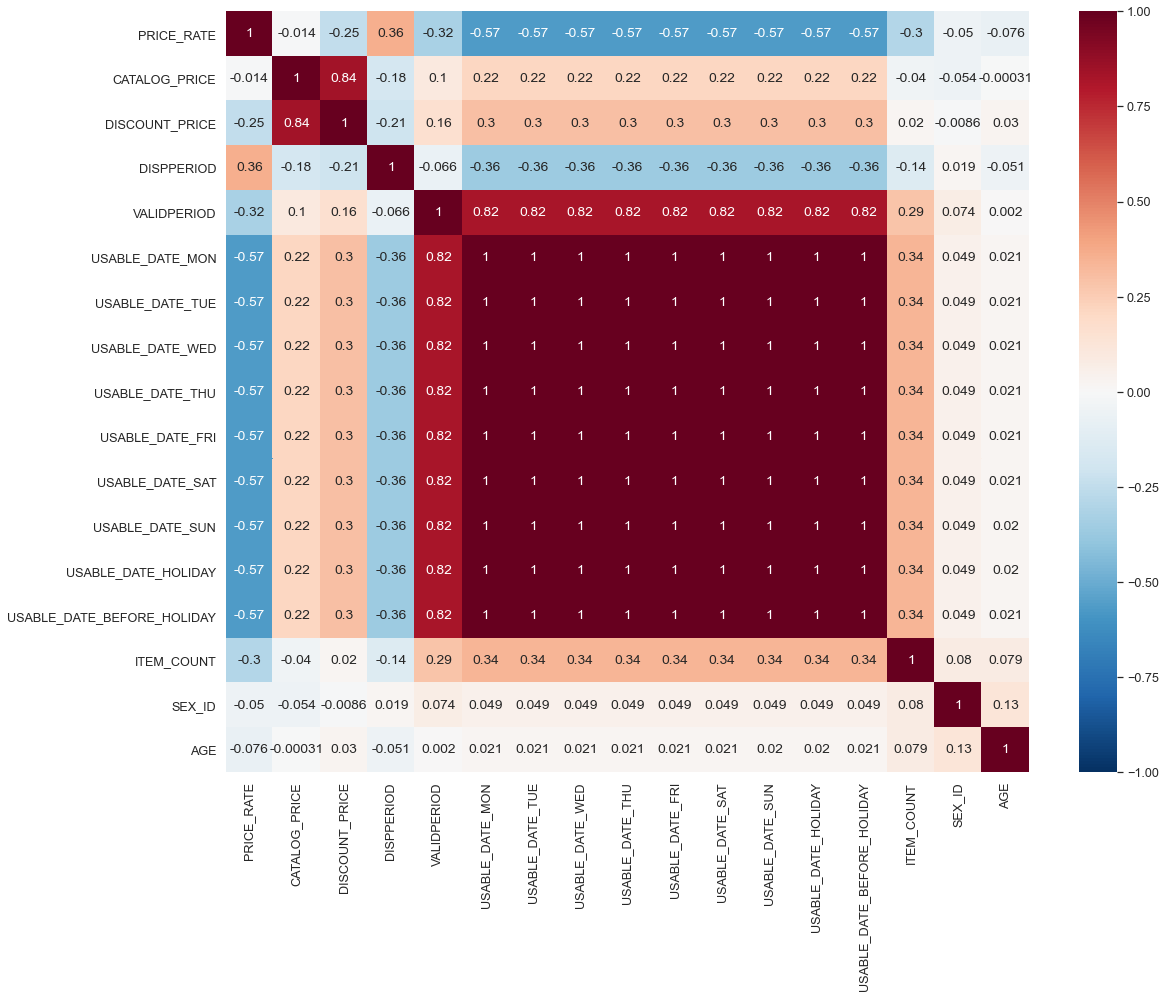

In [113]:
sns.set(font_scale=1.15)
plt.figure(figsize=(18,14))
sns.heatmap(
    df_merged.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

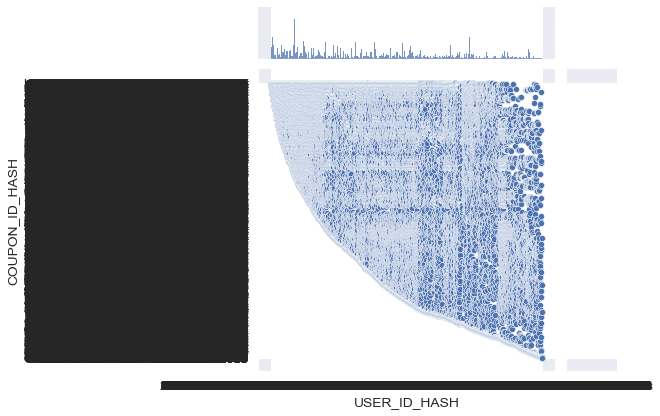

In [114]:
sns.jointplot(
    x='USER_ID_HASH', 
    y='COUPON_ID_HASH', 
    data=df_merged);

## Train and Test Table Extractions

In [115]:
df_coupons_test = df_test_coupon_list

In [116]:
df_coupons_test['USER_ID_HASH']='To Be Found'

In [117]:
df_coupons_train=pd.concat([df_merged,df_coupons_test],axis=0)


In [118]:
features_selected=['USER_ID_HASH','COUPON_ID_HASH','GENRE_ENG','LARGE_AREA_ENG','DISCOUNT_PRICE','SMALL_AREA_ENG']
df_coupons_train=df_coupons_train[features_selected]
df_coupons_train['DISCOUNT_PRICE']=1 / np.log10(df_coupons_train['DISCOUNT_PRICE'])
df_coupons_train


,USER_ID_HASH,COUPON_ID_HASH,GENRE_ENG,LARGE_AREA_ENG,DISCOUNT_PRICE,SMALL_AREA_ENG
0,70525f64c16893bcbf600ab790053d01,6b263844241eea98c5a97f1335ea82af,Food,Kanto,0.314852,Saitama
1,70525f64c16893bcbf600ab790053d01,c5e7bccd11979d5378fb58ee6266e692,Food,Kanto,0.277787,Saitama
2,70525f64c16893bcbf600ab790053d01,b4ee01eae835536eae1ba31500db5b64,Food,Kanto,0.287594,Saitama
3,70525f64c16893bcbf600ab790053d01,489513aa18d96ac0f08d48ccad4b5475,Food,Kanto,0.324762,Saitama
4,70525f64c16893bcbf600ab790053d01,b93fb3c7c63f0a74f5844b1ab7386154,Hair salon,Kanto,0.261744,Saitama
...,...,...,...,...,...,...
305,To Be Found,7ae7775de3a0554dae8e114102c77ba2,Leisure,China,0.313447,Hiroshima
306,To Be Found,8fd793531e6b835a112338ee9a5f40e9,Hotel and Japanese hotel,China,0.273732,Hiroshima
307,To Be Found,3dcb2da19b5975df3a17313dd4e05f27,Hotel and Japanese hotel,China,0.270346,Hiroshima
308,To Be Found,97bab5a07fe422716e899f452d6beff2,Lesson,China,0.233220,Hiroshima


## Categorical Features Converted

In [119]:

features_selected_cat=['GENRE_ENG','LARGE_AREA_ENG','SMALL_AREA_ENG']
df_coupons_tr_cat=df_coupons_train[features_selected_cat]
df_coupons_tr_cat=pd.get_dummies(df_coupons_tr_cat, dummy_na=False)
final_features=list(set(features_selected)-set(features_selected_cat))
df_coupons_tr_cat
df_coupons_tr_final=pd.concat([df_coupons_train[final_features],df_coupons_tr_cat],axis=1)
df_coupons_tr_final

,COUPON_ID_HASH,USER_ID_HASH,DISCOUNT_PRICE,GENRE_ENG_Beauty,GENRE_ENG_Delivery service,GENRE_ENG_Food,GENRE_ENG_Gift card,GENRE_ENG_Hair salon,GENRE_ENG_Health and medical,GENRE_ENG_Hotel and Japanese hotel,...,SMALL_AREA_ENG_Tachikawa / Machida / Hachioji,SMALL_AREA_ENG_Tochigi,SMALL_AREA_ENG_Tokushima,SMALL_AREA_ENG_Tottori,SMALL_AREA_ENG_Toyama,SMALL_AREA_ENG_Triple,SMALL_AREA_ENG_Wakayama,SMALL_AREA_ENG_Yamaguchi,SMALL_AREA_ENG_Yamanashi,SMALL_AREA_ENG_Yokohama
0,6b263844241eea98c5a97f1335ea82af,70525f64c16893bcbf600ab790053d01,0.314852,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,c5e7bccd11979d5378fb58ee6266e692,70525f64c16893bcbf600ab790053d01,0.277787,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,b4ee01eae835536eae1ba31500db5b64,70525f64c16893bcbf600ab790053d01,0.287594,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,489513aa18d96ac0f08d48ccad4b5475,70525f64c16893bcbf600ab790053d01,0.324762,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,b93fb3c7c63f0a74f5844b1ab7386154,70525f64c16893bcbf600ab790053d01,0.261744,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,7ae7775de3a0554dae8e114102c77ba2,To Be Found,0.313447,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,8fd793531e6b835a112338ee9a5f40e9,To Be Found,0.273732,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307,3dcb2da19b5975df3a17313dd4e05f27,To Be Found,0.270346,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
308,97bab5a07fe422716e899f452d6beff2,To Be Found,0.233220,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
df_coupons_tr_final
df_train=df_coupons_tr_final[df_coupons_tr_final['USER_ID_HASH']!='To Be Found']
df_test1=df_coupons_tr_final[df_coupons_tr_final['USER_ID_HASH'] == 'To Be Found']


df_train=df_train.drop('COUPON_ID_HASH', axis=1)
df_train_final=df_train.groupby('USER_ID_HASH').mean()
df_train_final

,DISCOUNT_PRICE,GENRE_ENG_Beauty,GENRE_ENG_Delivery service,GENRE_ENG_Food,GENRE_ENG_Gift card,GENRE_ENG_Hair salon,GENRE_ENG_Health and medical,GENRE_ENG_Hotel and Japanese hotel,GENRE_ENG_Leisure,GENRE_ENG_Lesson,...,SMALL_AREA_ENG_Tachikawa / Machida / Hachioji,SMALL_AREA_ENG_Tochigi,SMALL_AREA_ENG_Tokushima,SMALL_AREA_ENG_Tottori,SMALL_AREA_ENG_Toyama,SMALL_AREA_ENG_Triple,SMALL_AREA_ENG_Wakayama,SMALL_AREA_ENG_Yamaguchi,SMALL_AREA_ENG_Yamanashi,SMALL_AREA_ENG_Yokohama
USER_ID_HASH,,,,,,,,,,,,,,,,,,,,,
00035b86e6884589ec8d28fbf2fe7757,0.315141,0.0,0.000000,1.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000cc06982785a19e2a2fdb40b1c9d59,0.283733,0.0,0.125000,0.375,0.000000,0.250000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0013518e41c416cd6a181d277dd8ca0b,0.412621,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.333333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001acdee812a18acfd7509172bed5700,0.365266,0.0,0.333333,0.000,0.166667,0.166667,0.0,0.000000,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002822059a01d895fad84f2f2ff5c1f1,0.298816,0.0,1.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff1a623187cefd7a594e338709b0f40,0.276378,0.0,0.000000,0.125,0.375000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff4a076cfda6ff9dbe85e1cb678791b,0.166667,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff970d2014c3e10a77e38d540239017,0.394049,0.0,0.000000,0.500,0.000000,0.000000,0.0,0.250000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
Weights={'GENRE_ENG': 4,
    'DISCOUNT_PRICE': 4,
    'LARGE_AREA_ENG': 1.5,
    'SMALL_AREA_ENG': 9}

In [122]:
def find_weights(weights_dict, colname):
    for col, weight in weights_dict.items():
        if col in colname:
            return weight
    raise ValueError

In [123]:
Weight_values = [find_weights(Weights, colname) for colname in df_train_final.columns]
Weight = np.diag(Weight_values)
Weight

array([[4., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 9., 0., 0.],
       [0., 0., 0., ..., 0., 9., 0.],
       [0., 0., 0., ..., 0., 0., 9.]])

In [124]:
df_test=df_test1.drop('USER_ID_HASH', axis=1)
df_test_final=df_test.drop('COUPON_ID_HASH', axis=1)
df_test_final

,DISCOUNT_PRICE,GENRE_ENG_Beauty,GENRE_ENG_Delivery service,GENRE_ENG_Food,GENRE_ENG_Gift card,GENRE_ENG_Hair salon,GENRE_ENG_Health and medical,GENRE_ENG_Hotel and Japanese hotel,GENRE_ENG_Leisure,GENRE_ENG_Lesson,...,SMALL_AREA_ENG_Tachikawa / Machida / Hachioji,SMALL_AREA_ENG_Tochigi,SMALL_AREA_ENG_Tokushima,SMALL_AREA_ENG_Tottori,SMALL_AREA_ENG_Toyama,SMALL_AREA_ENG_Triple,SMALL_AREA_ENG_Wakayama,SMALL_AREA_ENG_Yamaguchi,SMALL_AREA_ENG_Yamanashi,SMALL_AREA_ENG_Yokohama
0,0.291566,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.287835,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.314852,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.375550,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273732,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.313447,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
306,0.273732,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0.270346,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0.233220,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [125]:

scores = np.dot(np.dot(df_train_final, Weight), df_test_final.T)
scores

array([[4.36753751, 4.36283367, 4.39689118, ..., 0.34078747, 0.29398809,
        0.31583343],
       [5.20590783, 5.20167278, 5.23233604, ..., 0.30682376, 0.26468852,
        0.2843567 ],
       [0.481225  , 0.47506615, 0.51965841, ..., 1.77953391, 0.38492511,
        1.74686103],
       ...,
       [2.45956512, 2.45368348, 2.49626865, ..., 1.42611714, 0.36759967,
        1.39491487],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29156625, 0.2878347 , 0.31485241, ..., 0.27034553, 0.23321974,
        0.25054958]])

In [126]:
coupons=df_test1['COUPON_ID_HASH']
ind = df_train_final.index
columns = pd.Series([coupons[i] for i in range(0, scores.shape[1])], name='COUPON_ID_hash')
df_final = pd.DataFrame(index=ind, columns=columns, data=scores)
df_final

COUPON_ID_hash,c76ea297ebd3a5a4d3bf9f75269f66fa,16a9c255c41dbeb9c8484dfc782a2a89,ca7065a34aff7f15df48713a66f3d8b3,79de77aa8c36fdf17cb3366e2084e353,668971cfcbfd84e5b603b5ab301d6ce4,17d83b27fbae3d86e9d173b45e25d90e,3a38f6aaca4924b24487a9d8206ac9e4,ee06ee50d4c9c1517553735a2f78ea93,691ac7cbfd8359eb01c93cf44da1416d,d4175689b980cc82b73d176155d6416a,...,10a5759c0191b9097fa91650625e5a95,4bdb84678cb42868b0ced6d95d983788,2fcca928b8b3e9ead0f2cecffeea50c1,a6de36cd4b8a24503ddbda16109f4d3e,8b367b64652ebdf7c940bce7c1e9747d,7ae7775de3a0554dae8e114102c77ba2,8fd793531e6b835a112338ee9a5f40e9,3dcb2da19b5975df3a17313dd4e05f27,97bab5a07fe422716e899f452d6beff2,44c5cee00cbc6873e8ae9aff8ebbdf54
USER_ID_HASH,,,,,,,,,,,,,,,,,,,,,
00035b86e6884589ec8d28fbf2fe7757,4.367538,4.362834,4.396891,4.473405,0.345056,0.355932,0.345980,0.360335,0.347909,0.362834,...,0.323055,0.313480,0.420800,0.467053,0.277408,0.395120,0.345056,0.340787,0.293988,0.315833
000cc06982785a19e2a2fdb40b1c9d59,5.205908,5.201673,5.232336,5.301224,4.685667,4.695459,4.686499,4.699423,4.688236,4.701673,...,0.290859,0.282238,0.378862,0.420506,0.249761,0.355741,0.310667,0.306824,0.264689,0.284357
0013518e41c416cd6a181d277dd8ca0b,0.481225,0.475066,0.519658,0.619840,0.451789,0.466030,0.453000,0.471794,0.455526,0.475066,...,1.756317,1.743780,0.550962,0.611523,1.696550,0.517339,1.785123,1.779534,0.384925,1.746861
001acdee812a18acfd7509172bed5700,0.425997,0.420545,0.460020,0.548704,1.066607,1.079213,1.067678,1.084315,1.069914,1.087212,...,0.374440,0.363342,1.154398,1.208008,0.321532,1.124633,0.399940,0.394992,0.340749,0.366069
002822059a01d895fad84f2f2ff5c1f1,0.348499,0.344039,0.376332,0.448883,0.327182,0.337495,0.328058,0.341669,0.329888,0.344039,...,0.306321,0.297242,0.399002,0.442860,0.263039,0.374652,0.327182,0.323135,0.278760,0.299473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff1a623187cefd7a594e338709b0f40,0.822330,0.818205,0.848074,0.915176,0.302614,0.312153,0.303425,0.316014,0.305117,0.318205,...,0.283319,0.274922,0.369041,0.409606,0.243287,0.346520,0.302614,0.298871,0.257828,0.276986
fff4a076cfda6ff9dbe85e1cb678791b,0.194377,0.191890,0.209902,0.250367,0.182488,0.188240,0.182977,0.190568,0.183997,0.191890,...,0.170852,0.165788,0.222546,0.247008,0.146711,0.208965,0.182488,0.180230,0.155480,0.167033
fff970d2014c3e10a77e38d540239017,2.459565,2.453683,2.496269,2.591941,0.431454,0.445054,0.432610,0.450559,0.435022,0.453683,...,1.403945,1.391972,0.526164,0.583999,1.346869,0.494053,1.431454,1.426117,0.367600,1.394915


In [127]:
def get_top10_coupons(row):
    sorted_rw = row.sort_values()
    return ' '.join(sorted_rw.index[-10:][::-1].tolist())

## output of all the user id’s and the purchased_coupons

In [128]:

final_out = df_final.apply(get_top10_coupons, axis=1)
final_out

USER_ID_HASH
00035b86e6884589ec8d28fbf2fe7757    fc5f052a1bd97696fbcab35d8d974b73 262572324a598...
000cc06982785a19e2a2fdb40b1c9d59    e3e9027e1b87d957b1ccdb24d128e455 8c470d8651dbc...
0013518e41c416cd6a181d277dd8ca0b    c988d799bc7db9254fe865ee6cf2d4ff 0c01530659756...
001acdee812a18acfd7509172bed5700    9ce0b65cbbc6645e9ca4b4719f30a2e9 281326ffac6d5...
002822059a01d895fad84f2f2ff5c1f1    e4db7645ae556f252e60636df7c8eac8 7ae4e60eab2e4...
                                                          ...                        
fff1a623187cefd7a594e338709b0f40    c988d799bc7db9254fe865ee6cf2d4ff 0c01530659756...
fff4a076cfda6ff9dbe85e1cb678791b    c988d799bc7db9254fe865ee6cf2d4ff d79a889ee9d07...
fff970d2014c3e10a77e38d540239017    f453a31322bc6acc85d3b10ddace13e1 3c5bdd8fea067...
fffafc024e264d5d539813444cf61199    c988d799bc7db9254fe865ee6cf2d4ff 862889265ec91...
ffff56dbf3c782c3532f88c6c79817ba    c988d799bc7db9254fe865ee6cf2d4ff 0c01530659756...
Length: 13010, dtype: object

In [129]:
df_out_put = pd.DataFrame(data = {'USER_ID_HASH': final_out.index, 'PURCHASED_COUPONS':final_out.values})

In [130]:
df_out_put

,USER_ID_HASH,PURCHASED_COUPONS
0,00035b86e6884589ec8d28fbf2fe7757,fc5f052a1bd97696fbcab35d8d974b73 262572324a598...
1,000cc06982785a19e2a2fdb40b1c9d59,e3e9027e1b87d957b1ccdb24d128e455 8c470d8651dbc...
2,0013518e41c416cd6a181d277dd8ca0b,c988d799bc7db9254fe865ee6cf2d4ff 0c01530659756...
3,001acdee812a18acfd7509172bed5700,9ce0b65cbbc6645e9ca4b4719f30a2e9 281326ffac6d5...
4,002822059a01d895fad84f2f2ff5c1f1,e4db7645ae556f252e60636df7c8eac8 7ae4e60eab2e4...
...,...,...
13005,fff1a623187cefd7a594e338709b0f40,c988d799bc7db9254fe865ee6cf2d4ff 0c01530659756...
13006,fff4a076cfda6ff9dbe85e1cb678791b,c988d799bc7db9254fe865ee6cf2d4ff d79a889ee9d07...
13007,fff970d2014c3e10a77e38d540239017,f453a31322bc6acc85d3b10ddace13e1 3c5bdd8fea067...
13008,fffafc024e264d5d539813444cf61199,c988d799bc7db9254fe865ee6cf2d4ff 862889265ec91...
